# using one hot encoding improves performance

In [1]:
import sys
import os

# Add the path to the directory containing tree.py
sys.path.append(os.path.abspath("../"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from tree.utils import *
from metrics import *

np.random.seed(42)


Decision Tree Structure:
?(attr 4 <= 0.26)
    Yes: ?(attr 0 <= 1.47)
        Yes: ?(attr 4 <= -1.76)
            Yes: ?(attr 1 <= 0.09)
                Yes: ?(attr 0 <= 0.05)
                    Yes: Class: 0.6566
                    No: Class: 0.4128
                No: Class: 0.9634
            No: ?(attr 2 <= 1.00)
                Yes: ?(attr 3 <= -0.91)
                    Yes: Class: 0.0798
                    No: Class: -0.5008
                No: Class: 0.8221
        No: ?(attr 0 <= 1.87)
            Yes: Class: 1.4535
            No: Class: 0.8272
    No: ?(attr 4 <= 0.51)
        Yes: ?(attr 0 <= 0.14)
            Yes: Class: 1.8968
            No: Class: 2.7202
        No: ?(attr 4 <= 0.98)
            Yes: ?(attr 0 <= -0.48)
                Yes: ?(attr 0 <= -0.54)
                    Yes: Class: 1.8658
                    No: Class: 1.1586
                No: ?(attr 0 <= 0.79)
                    Yes: Class: 0.3214
                    No: Class: 0.7871
            No: Cla

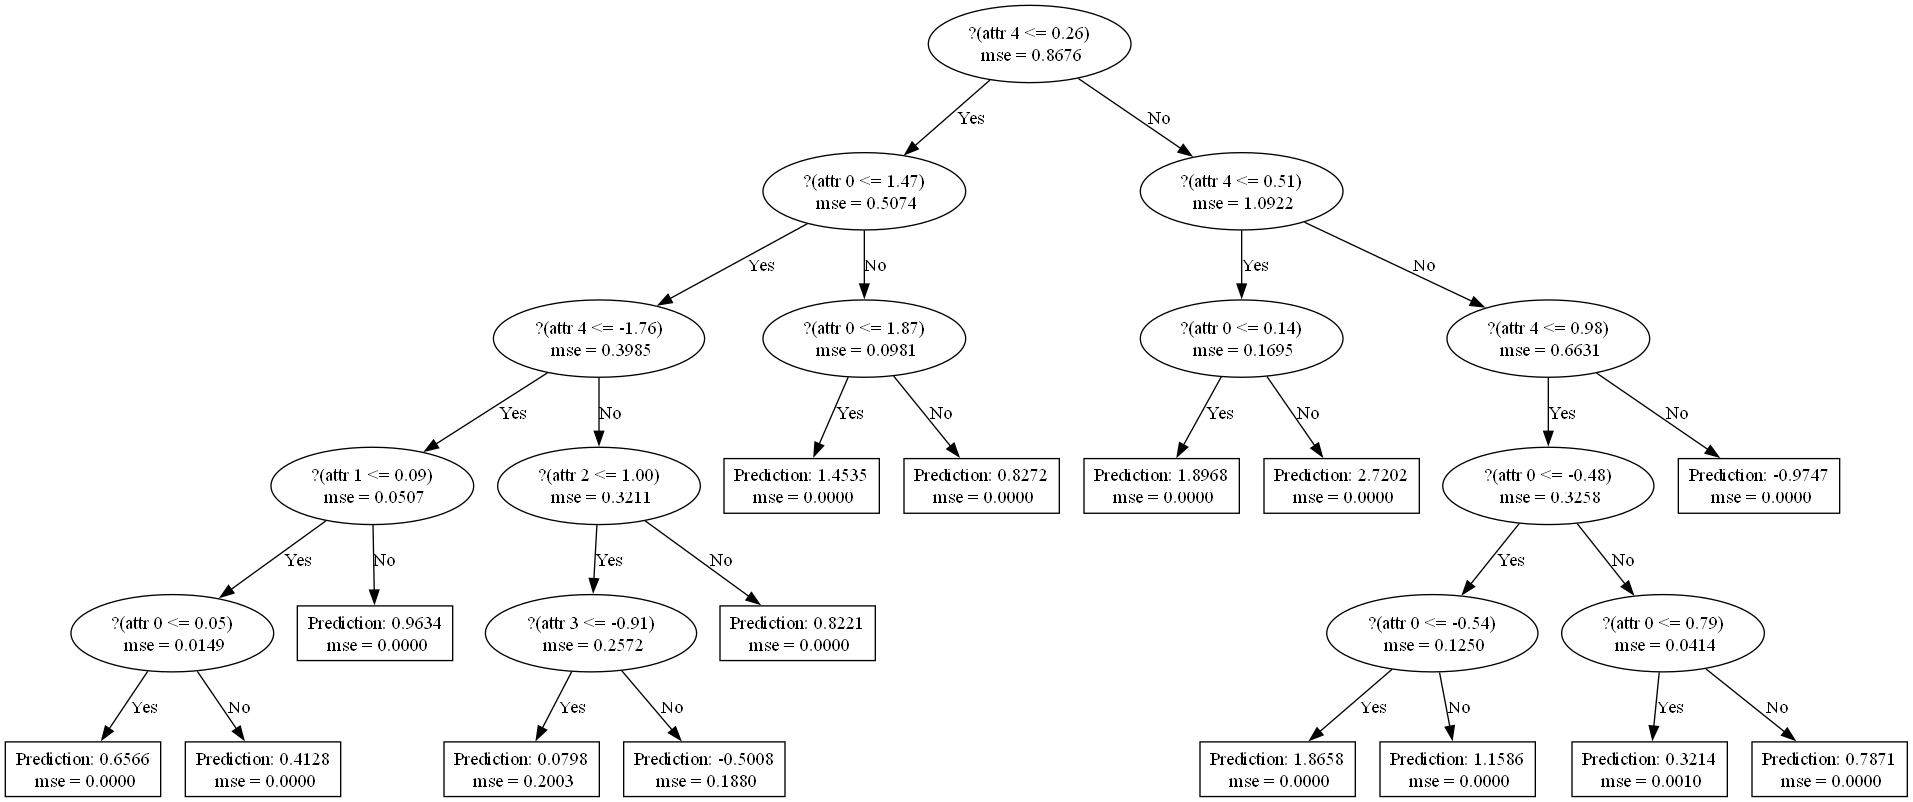

Criteria : information_gain
RMSE:  0.30942542324416766
MAE:  0.19901069613260827

Decision Tree Structure:
?(attr 0 <= -0.48)
    Yes: ?(attr 0 <= -1.22)
        Yes: ?(attr 0 <= -1.46)
            Yes: ?(attr 0 <= -1.55)
                Yes: ?(attr 0 <= -1.73)
                    Yes: Class: -0.0771
                    No: Class: 0.013
                No: Class: -0.7537
            No: ?(attr 0 <= -1.32)
                Yes: Class: -0.8895
                No: Class: 0.4738
        No: ?(attr 0 <= -0.56)
            Yes: ?(attr 0 <= -0.60)
                Yes: ?(attr 0 <= -0.66)
                    Yes: Class: 0.6566
                    No: Class: 1.8658
                No: Class: 0.2323
            No: ?(attr 0 <= -0.49)
                Yes: Class: 1.8968
                No: Class: 1.1586
    No: ?(attr 0 <= 0.50)
        Yes: ?(attr 0 <= 0.11)
            Yes: ?(attr 0 <= -0.23)
                Yes: ?(attr 0 <= -0.35)
                    Yes: Class: -0.68
                    No: Clas

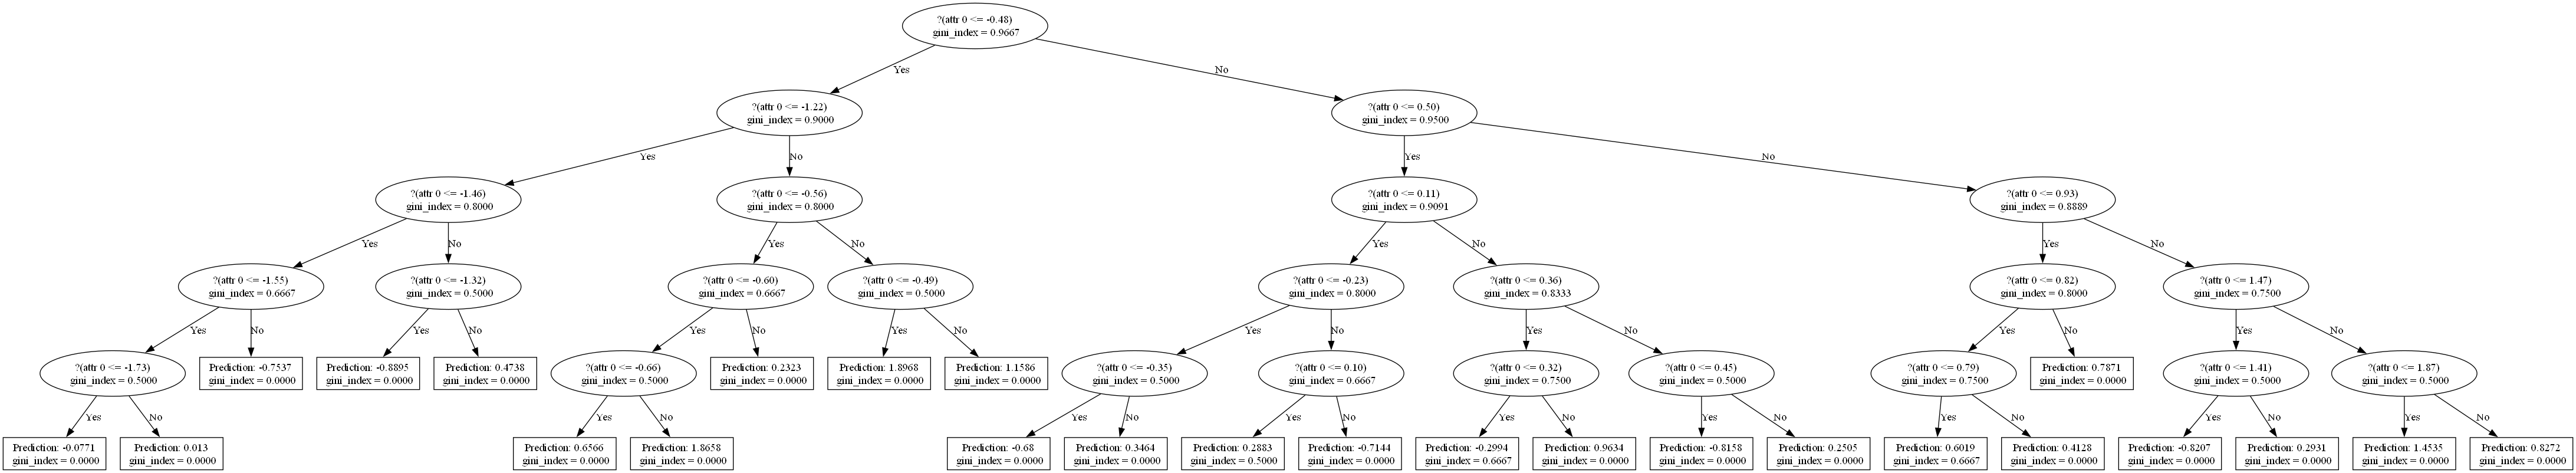

Criteria : gini_index
RMSE:  0.5551470151603657
MAE:  0.2218405671355926


In [2]:
# Test case 1
# Real Input and Real Output

N = 30
P = 5
X = pd.DataFrame(np.random.randn(N, P))
y = pd.Series(np.random.randn(N))


for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria :", criteria)
    print("RMSE: ", rmse(y_hat, y))
    print("MAE: ", mae(y_hat, y))


Decision Tree Structure:
?(attr 0 <= 0.46)
    Yes: ?(attr 1 <= 0.92)
        Yes: ?(attr 2 <= -0.59)
            Yes: ?(attr 0 <= -0.33)
                Yes: ?(attr 0 <= -0.63)
                    Yes: Class: 0
                    No: Class: 1
                No: ?(attr 0 <= 0.10)
                    Yes: Class: 2
                    No: Class: 1
            No: ?(attr 4 <= 2.14)
                Yes: ?(attr 2 <= 0.05)
                    Yes: Class: 1
                    No: Class: 1
                No: Class: 4
        No: ?(attr 2 <= -0.71)
            Yes: ?(attr 0 <= -0.87)
                Yes: Class: 4
                No: Class: 3
            No: Class: 4
    No: ?(attr 4 <= 0.68)
        Yes: ?(attr 4 <= -0.98)
            Yes: Class: 4
            No: ?(attr 0 <= 0.76)
                Yes: ?(attr 1 <= -0.77)
                    Yes: Class: 4
                    No: Class: 2
                No: Class: 2
        No: Class: 3



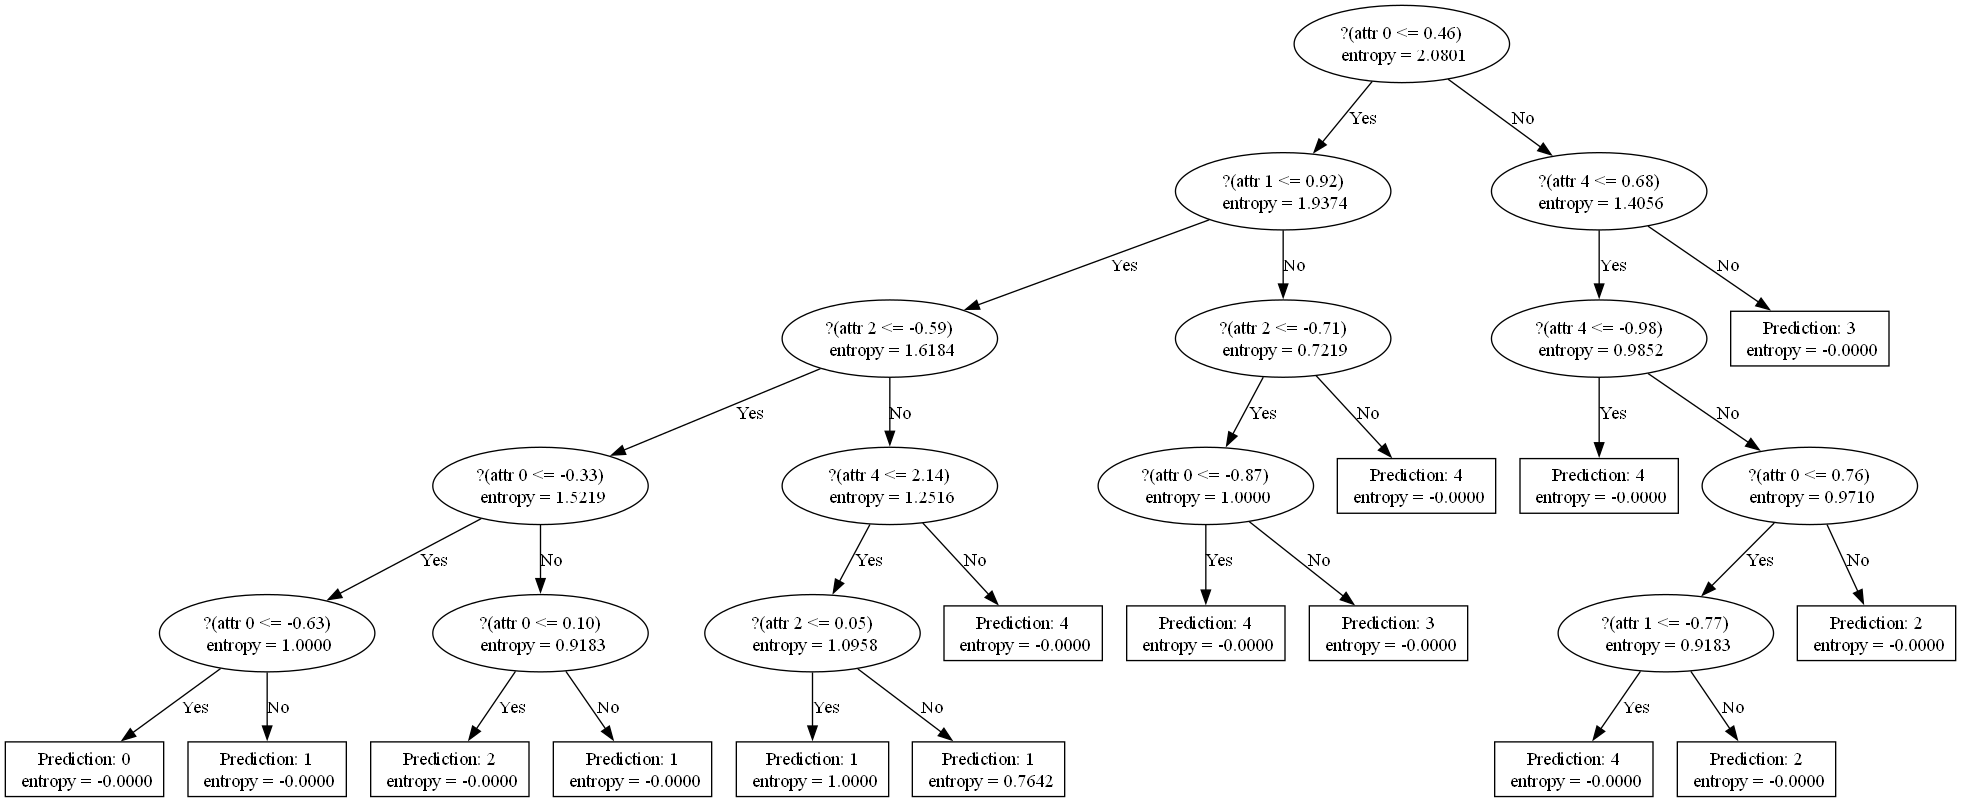

Criteria : information_gain
Accuracy:  0.9
Precision:  1.0
Recall:  0.9
Precision:  0.7692307692307693
Recall:  1.0
Precision:  1.0
Recall:  1.0
Precision:  1.0
Recall:  1.0
Precision:  1.0
Recall:  0.3333333333333333

Decision Tree Structure:
?(attr 0 <= 0.46)
    Yes: ?(attr 1 <= 0.92)
        Yes: ?(attr 2 <= -0.82)
            Yes: ?(attr 0 <= -0.41)
                Yes: Class: 0
                No: Class: 2
            No: ?(attr 4 <= 2.14)
                Yes: ?(attr 2 <= -0.31)
                    Yes: Class: 1
                    No: Class: 1
                No: Class: 4
        No: ?(attr 2 <= -0.71)
            Yes: ?(attr 0 <= -0.87)
                Yes: Class: 4
                No: Class: 3
            No: Class: 4
    No: ?(attr 4 <= 0.68)
        Yes: ?(attr 4 <= -0.98)
            Yes: Class: 4
            No: ?(attr 0 <= 0.76)
                Yes: ?(attr 1 <= -0.77)
                    Yes: Class: 4
                    No: Class: 2
                No: Class: 2
        N

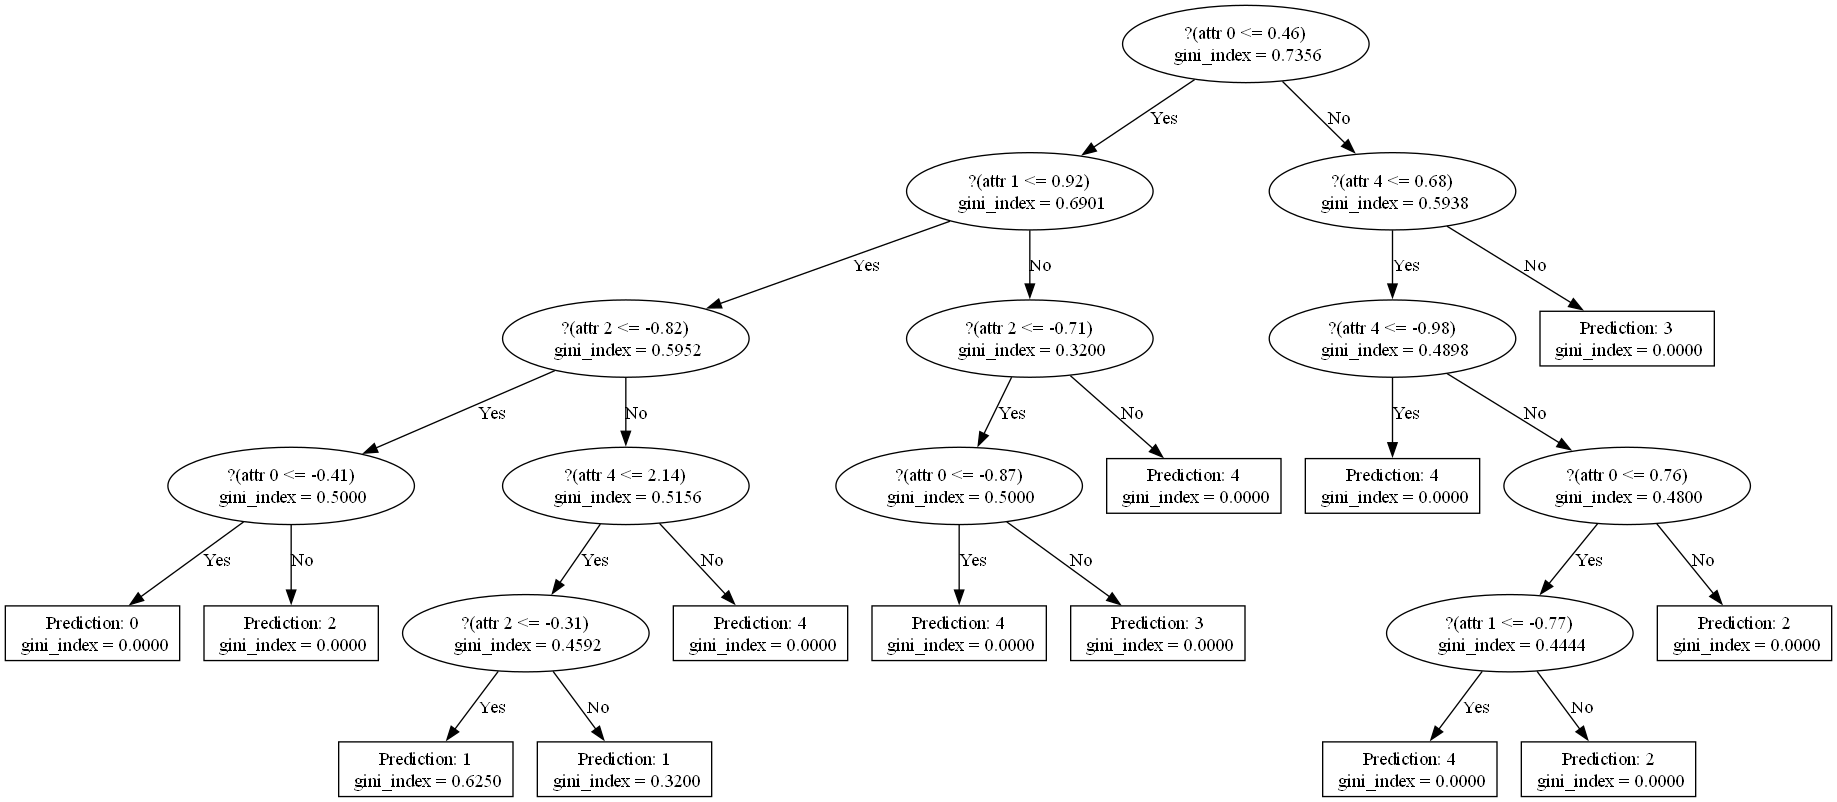

Criteria : gini_index
Accuracy:  0.8666666666666667
Precision:  1.0
Recall:  0.9
Precision:  0.7142857142857143
Recall:  1.0
Precision:  1.0
Recall:  0.8
Precision:  1.0
Recall:  1.0
Precision:  1.0
Recall:  0.3333333333333333


In [3]:
# Test case 2
# Real Input and Discrete Output

N = 30
P = 5
X = pd.DataFrame(np.random.randn(N, P))
y = pd.Series(np.random.randint(P, size=N), dtype="category")
# print(X)
# print(y)

for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria :", criteria)
    print("Accuracy: ", accuracy(y_hat, y))
    for cls in y.unique():
        print("Precision: ", precision(y_hat, y, cls))
        print("Recall: ", recall(y_hat, y, cls))



Decision Tree Structure:
?(attr 1 <= 0.00)
    Yes: ?(attr 4 <= 4.00)
        Yes: ?(attr 0 <= 0.00)
            Yes: Class: 4
            No: Class: 0
        No: ?(attr 4 <= 1.00)
            Yes: Class: 0
            No: ?(attr 0 <= 2.00)
                Yes: Class: 0
                No: Class: 4
    No: ?(attr 1 <= 4.00)
        Yes: ?(attr 0 <= 2.00)
            Yes: Class: 1
            No: ?(attr 3 <= 0.00)
                Yes: ?(attr 2 <= 1.00)
                    Yes: Class: 3
                    No: Class: 1
                No: ?(attr 0 <= 4.00)
                    Yes: Class: 1
                    No: Class: 3
        No: ?(attr 3 <= 4.00)
            Yes: ?(attr 2 <= 1.00)
                Yes: ?(attr 0 <= 3.00)
                    Yes: Class: 2
                    No: Class: 1
                No: ?(attr 2 <= 0.00)
                    Yes: Class: 3
                    No: Class: 2
            No: ?(attr 3 <= 2.00)
                Yes: ?(attr 0 <= 0.00)
                    Y

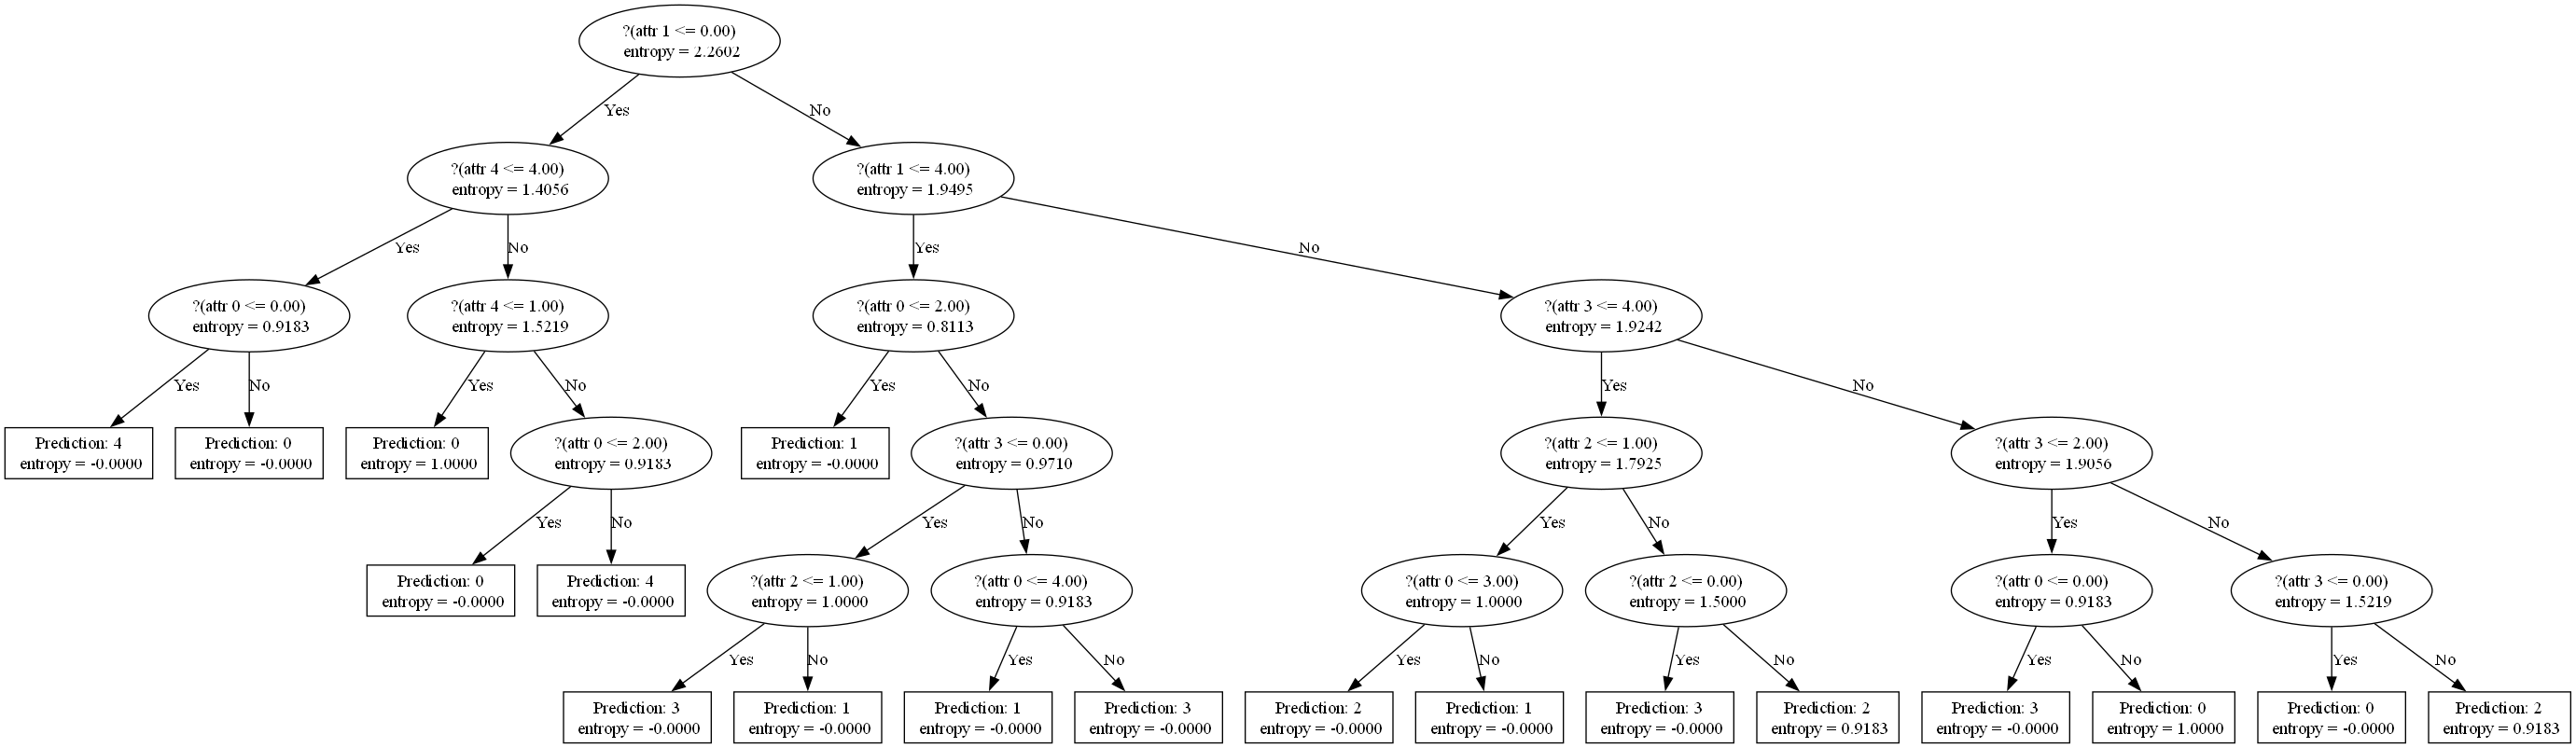

Criteria : information_gain
Accuracy:  0.8666666666666667
Precision:  0.75
Recall:  0.8571428571428571
Precision:  1.0
Recall:  1.0
Precision:  1.0
Recall:  0.7777777777777778
Precision:  0.7142857142857143
Recall:  1.0
Precision:  1.0
Recall:  0.8

Decision Tree Structure:
?(attr 1 <= 0.00)
    Yes: ?(attr 4 <= 4.00)
        Yes: ?(attr 0 <= 0.00)
            Yes: Class: 4
            No: Class: 0
        No: ?(attr 4 <= 1.00)
            Yes: Class: 0
            No: ?(attr 0 <= 2.00)
                Yes: Class: 0
                No: Class: 4
    No: ?(attr 0 <= 3.00)
        Yes: ?(attr 4 <= 0.00)
            Yes: ?(attr 2 <= 1.00)
                Yes: Class: 3
                No: Class: 1
            No: ?(attr 2 <= 1.00)
                Yes: Class: 2
                No: ?(attr 1 <= 1.00)
                    Yes: Class: 2
                    No: Class: 0
        No: ?(attr 2 <= 3.00)
            Yes: ?(attr 0 <= 2.00)
                Yes: Class: 1
                No: ?(attr 0 <= 0.

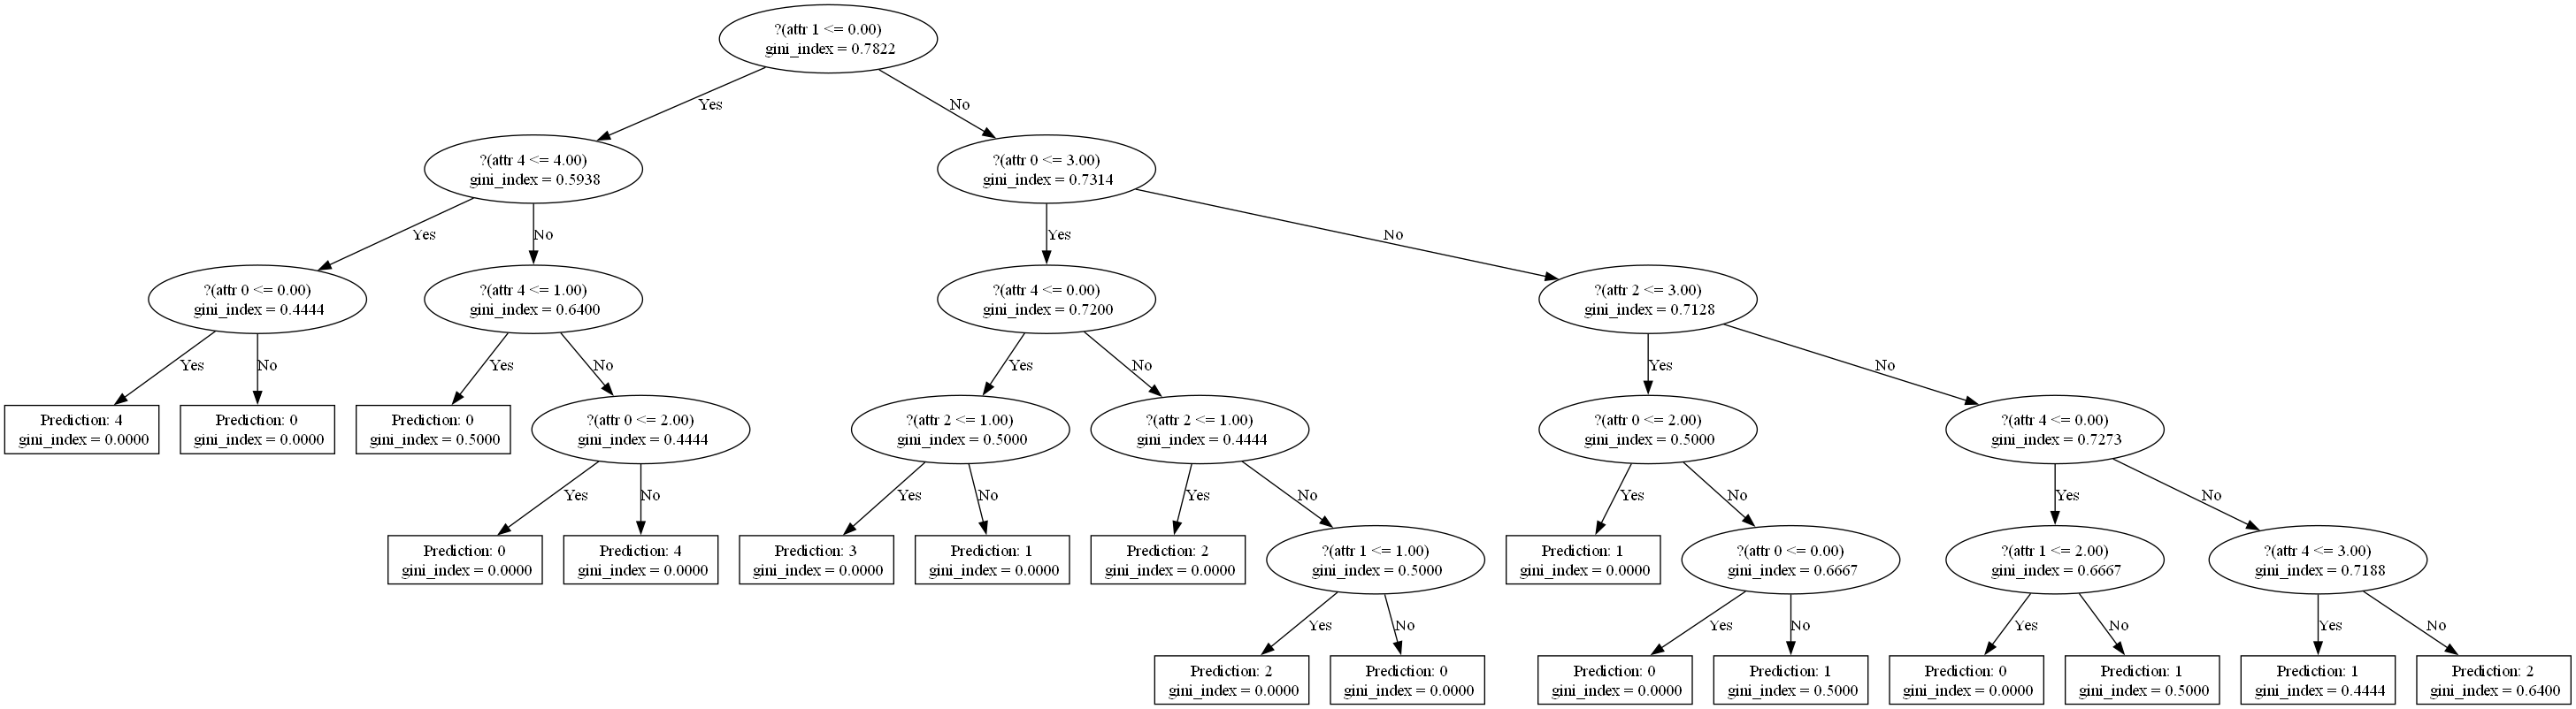

Criteria : gini_index
Accuracy:  0.7666666666666667
Precision:  0.8571428571428571
Recall:  0.8571428571428571
Precision:  1.0
Recall:  1.0
Precision:  0.7272727272727273
Recall:  0.8888888888888888
Precision:  0.5714285714285714
Recall:  0.8
Precision:  1.0
Recall:  0.2


In [4]:
# Test case 3
# Discrete Input and Discrete Output

N = 30
P = 5
X = pd.DataFrame({i: pd.Series(np.random.randint(P, size=N), dtype="category") for i in range(5)})
y = pd.Series(np.random.randint(P, size=N), dtype="category")
# print(X)
# print(y)

for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria :", criteria)
    # print(y_hat)
    print("Accuracy: ", accuracy(y_hat, y))
    for cls in y.unique():
        print("Precision: ", precision(y_hat, y, cls))
        print("Recall: ", recall(y_hat, y, cls))


Decision Tree Structure:
?(attr 4 <= 2.00)
    Yes: ?(attr 0 <= 4.00)
        Yes: ?(attr 1 <= 0.00)
            Yes: Class: -0.5769
            No: ?(attr 1 <= 1.00)
                Yes: Class: -0.326
                No: Class: 0.8711
        No: ?(attr 0 <= 1.00)
            Yes: ?(attr 1 <= 0.00)
                Yes: Class: -0.421
                No: Class: 0.5298
            No: ?(attr 0 <= 2.00)
                Yes: Class: -2.4716
                No: Class: 0.0866
    No: ?(attr 3 <= 2.00)
        Yes: ?(attr 1 <= 0.00)
            Yes: ?(attr 0 <= 2.00)
                Yes: Class: -0.604
                No: Class: -1.1297
            No: ?(attr 1 <= 2.00)
                Yes: ?(attr 0 <= 0.00)
                    Yes: Class: 0.3711
                    No: Class: 0.2898
                No: ?(attr 1 <= 3.00)
                    Yes: Class: -0.4326
                    No: Class: -2.0381
        No: ?(attr 1 <= 0.00)
            Yes: ?(attr 0 <= 2.00)
                Yes: ?(attr 2 <

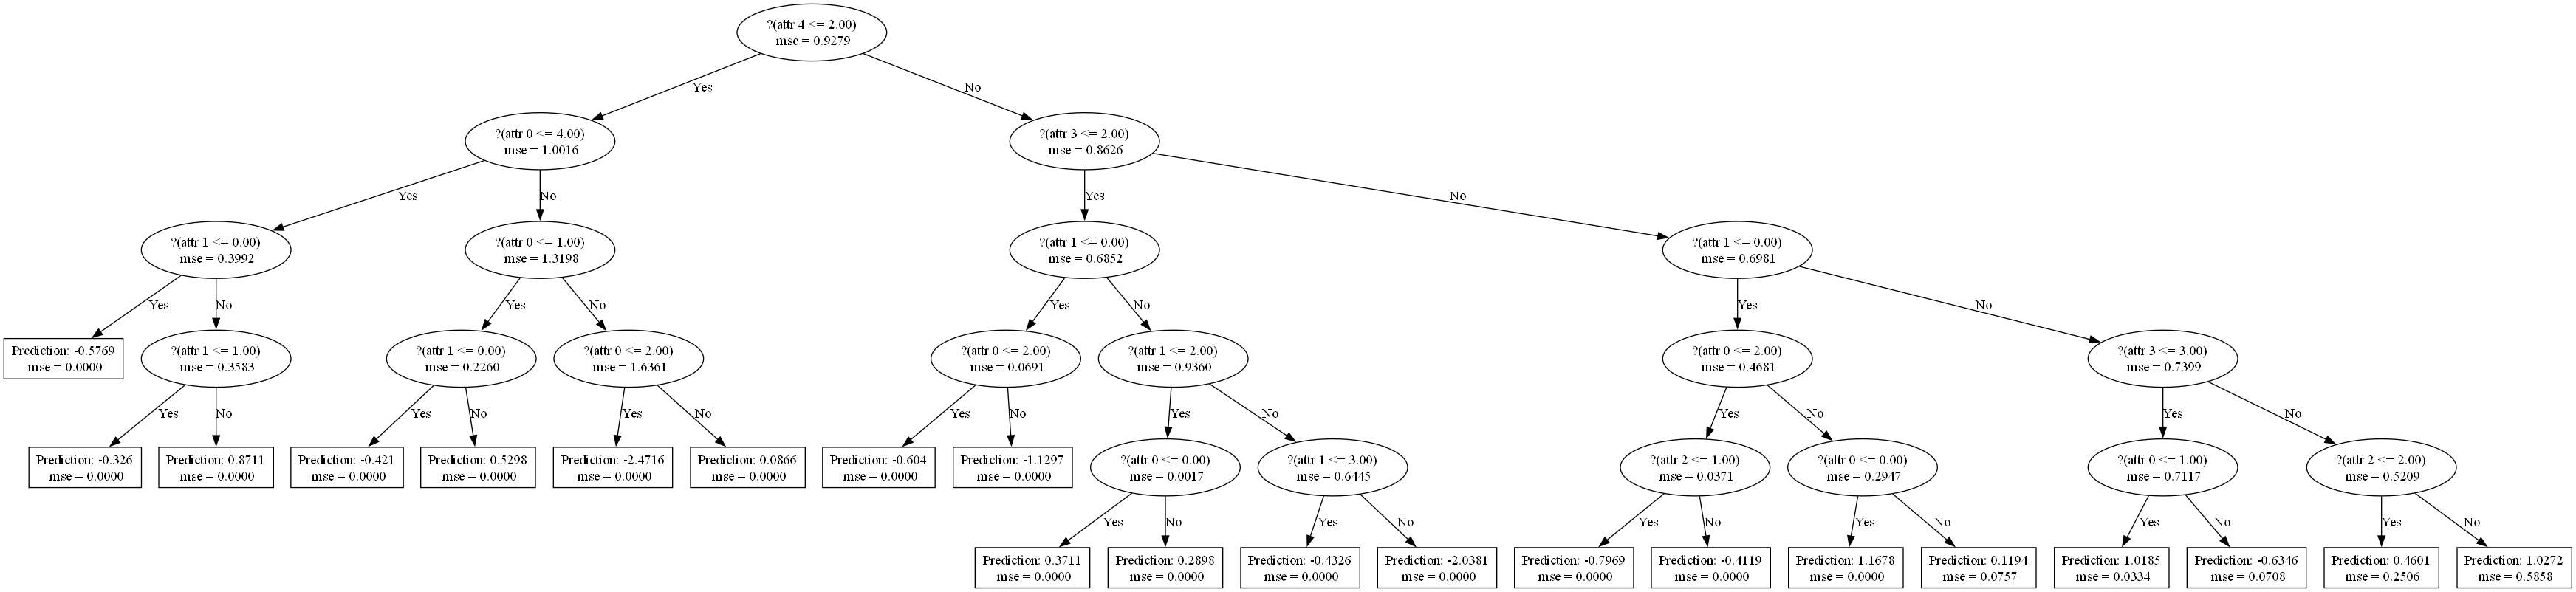

Criteria : information_gain
RMSE:  0.34280539312692593
MAE:  0.19714158874684676

Decision Tree Structure:
?(attr 0 <= 2.00)
    Yes: ?(attr 2 <= 1.00)
        Yes: ?(attr 1 <= 0.00)
            Yes: Class: -0.7969
            No: ?(attr 1 <= 1.00)
                Yes: Class: -2.4716
                No: Class: 0.3376
        No: ?(attr 1 <= 0.00)
            Yes: ?(attr 2 <= 3.00)
                Yes: Class: -0.4119
                No: Class: -0.604
            No: ?(attr 3 <= 1.00)
                Yes: ?(attr 1 <= 1.00)
                    Yes: Class: 0.5771
                    No: Class: -0.203
                No: ?(attr 3 <= 0.00)
                    Yes: Class: 0.2544
                    No: Class: 1.1826
    No: ?(attr 2 <= 0.00)
        Yes: ?(attr 1 <= 3.00)
            Yes: ?(attr 3 <= 2.00)
                Yes: Class: -0.4326
                No: Class: 1.2012
            No: ?(attr 1 <= 0.00)
                Yes: Class: 1.1678
                No: ?(attr 0 <= 0.00)
            

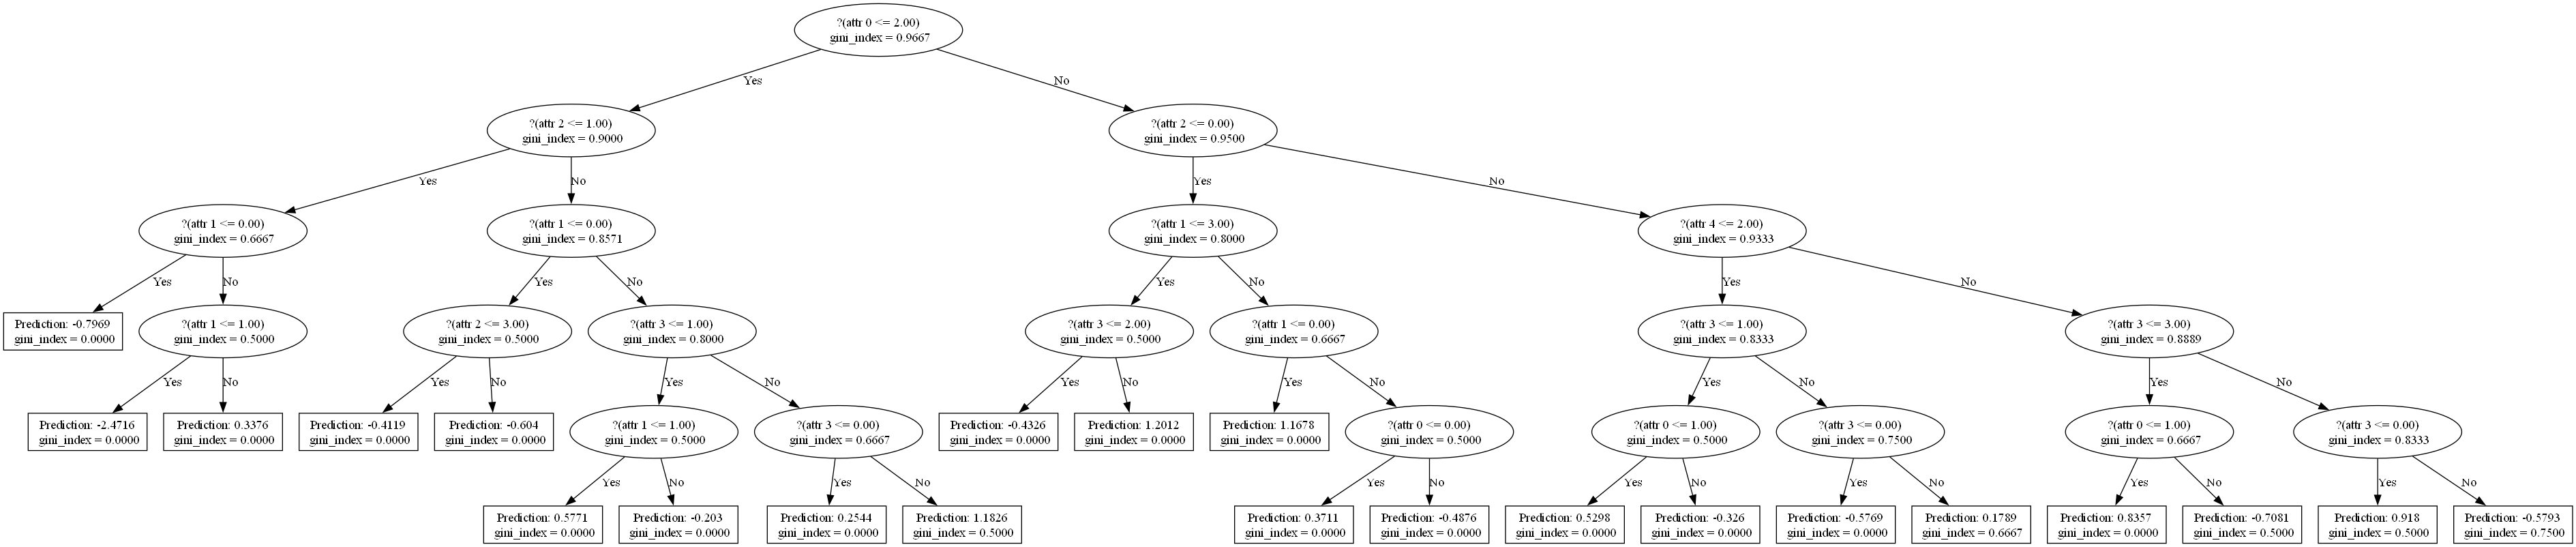

Criteria : gini_index
RMSE:  0.5258231063697885
MAE:  0.2945324357680638


In [5]:
# Test case 4
# Discrete Input and Real Output

N = 30
P = 5
X = pd.DataFrame({i: pd.Series(np.random.randint(P, size=N), dtype="category") for i in range(5)})
y = pd.Series(np.random.randn(N))

for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria :", criteria)
    print("RMSE: ", rmse(y_hat, y))
    print("MAE: ", mae(y_hat, y))
